<a href="https://colab.research.google.com/github/Emangohar/Students-Data-Visualization-/blob/main/%E2%80%9CStudent_Skill_Recommendation_System_using_Machine_Learning%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Step 2: Data Creation with Strong Feature Mapping
np.random.seed(42)
skills = {
    "Artificial Intelligence": 103,
    "Cyber Security": 96,
    "Data Science": 45,
    "Cloud Computing": 60,
    "Web/App Development": 67,
    "App Development": 30,
    "Graphic Designing": 35,
    "UI/UX Design": 20,
    "Digital Marketing": 44,
    "Video Editing": 27
}

data = []
id_counter = 1
for skill, count in skills.items():
    for _ in range(count):
        age = np.random.randint(18, 26)
        gender = np.random.choice(["Male","Female"])
        year_of_study = np.random.choice([1,2,3,4])

        # Strong mapping for each skill
        if skill == "Artificial Intelligence":
            major, study_hours, tech_exp = "CS", np.random.randint(5,7), "Advanced"
            coding, creativity, business = "High","Low","Low"
        elif skill == "Cyber Security":
            major, study_hours, tech_exp = "EE", np.random.randint(4,6), "Intermediate"
            coding, creativity, business = "Medium","Low","Low"
        elif skill == "Data Science":
            major, study_hours, tech_exp = "IT", np.random.randint(4,6), "Intermediate"
            coding, creativity, business = "High","Low","Medium"
        elif skill == "Cloud Computing":
            major, study_hours, tech_exp = "IT", np.random.randint(3,6), "Intermediate"
            coding, creativity, business = "Medium","Low","Low"
        elif skill == "Web/App Development":
            major, study_hours, tech_exp = "CS", np.random.randint(4,6), "Intermediate"
            coding, creativity, business = "High","Medium","Low"
        elif skill == "App Development":
            major, study_hours, tech_exp = "CS", np.random.randint(3,6), "Intermediate"
            coding, creativity, business = "High","Medium","Low"
        elif skill == "Graphic Designing":
            major, study_hours, tech_exp = "Design", np.random.randint(2,4), "Beginner"
            coding, creativity, business = "Low","High","Low"
        elif skill == "UI/UX Design":
            major, study_hours, tech_exp = "Design", np.random.randint(2,4), "Intermediate"
            coding, creativity, business = "Low","High","Low"
        elif skill == "Digital Marketing":
            major, study_hours, tech_exp = "Business", np.random.randint(1,3), "Beginner"
            coding, creativity, business = "Low","Medium","High"
        elif skill == "Video Editing":
            major, study_hours, tech_exp = "Design", np.random.randint(2,4), "Beginner"
            coding, creativity, business = "Low","High","Low"

        data.append([
            id_counter, age, gender, year_of_study, major,
            study_hours, tech_exp, coding, creativity, business, skill
        ])
        id_counter += 1

columns = [
    "id","age","gender","year_of_study","major","study_hours",
    "tech_experience","coding_interest","creativity","business_mindset",
    "preferred_skill"
]
df = pd.DataFrame(data, columns=columns)

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (527, 11)
   id  age  gender  year_of_study major  study_hours tech_experience  \
0   1   24  Female              1    CS            5        Advanced   
1   2   20  Female              1    CS            5        Advanced   
2   3   24  Female              3    CS            5        Advanced   
3   4   20    Male              4    CS            5        Advanced   
4   5   21  Female              4    CS            5        Advanced   

  coding_interest creativity business_mindset          preferred_skill  
0            High        Low              Low  Artificial Intelligence  
1            High        Low              Low  Artificial Intelligence  
2            High        Low              Low  Artificial Intelligence  
3            High        Low              Low  Artificial Intelligence  
4            High        Low              Low  Artificial Intelligence  


/tmp/ipython-input-3785370664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="preferred_skill", data=df, order=df["preferred_skill"].value_counts().index, palette="viridis")


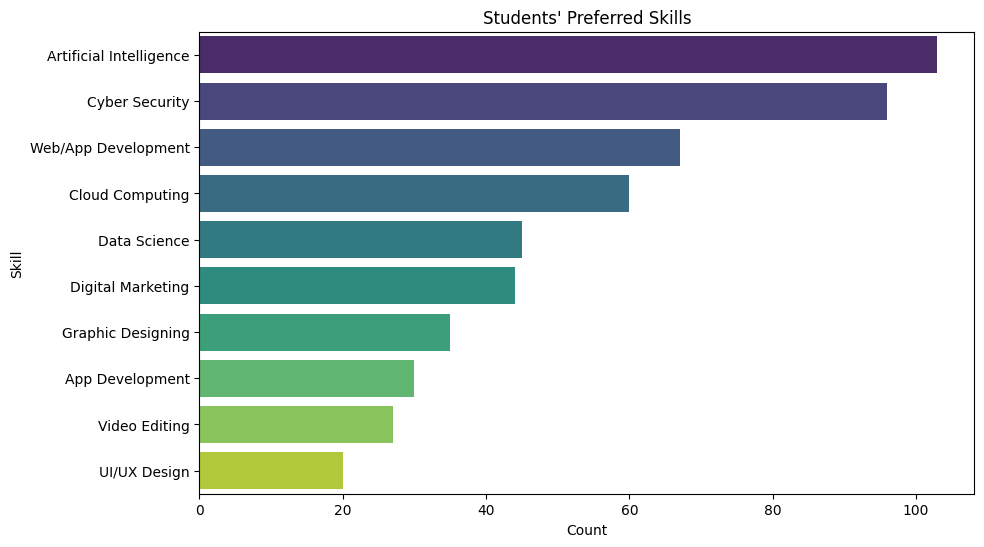

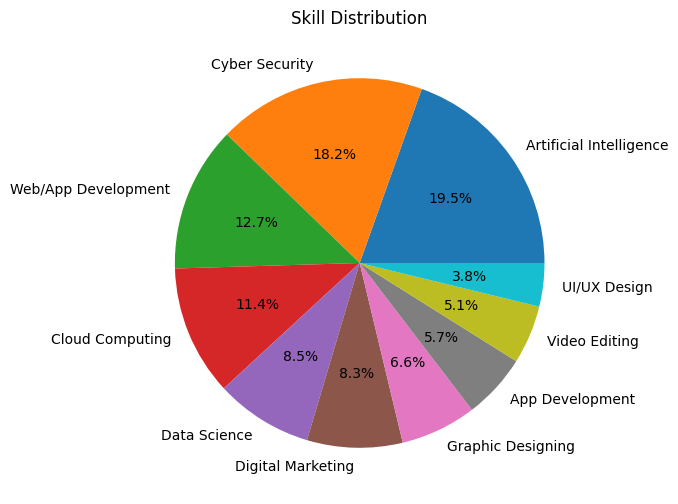

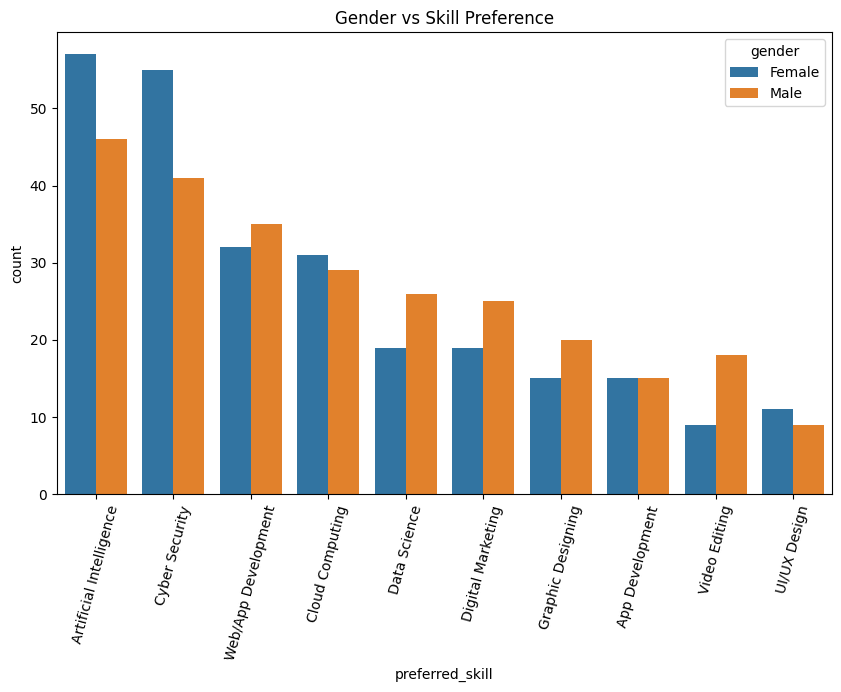

In [3]:
# Step 3: EDA
plt.figure(figsize=(10,6))
sns.countplot(y="preferred_skill", data=df, order=df["preferred_skill"].value_counts().index, palette="viridis")
plt.title("Students' Preferred Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()

plt.figure(figsize=(6,6))
df["preferred_skill"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Skill Distribution")
plt.ylabel("")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="preferred_skill", hue="gender", data=df, order=df["preferred_skill"].value_counts().index)
plt.xticks(rotation=75)
plt.title("Gender vs Skill Preference")
plt.show()

In [4]:
# Step 4: ML Preparation
X = df.drop(columns=["id","preferred_skill"])
y = df["preferred_skill"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 5: Train Model
model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8679245283018868
                         precision    recall  f1-score   support

        App Development       0.33      0.17      0.22         6
Artificial Intelligence       1.00      1.00      1.00        21
        Cloud Computing       1.00      1.00      1.00        12
         Cyber Security       1.00      1.00      1.00        19
           Data Science       1.00      1.00      1.00         9
      Digital Marketing       1.00      1.00      1.00         9
      Graphic Designing       0.50      0.43      0.46         7
           UI/UX Design       1.00      1.00      1.00         4
          Video Editing       0.33      0.40      0.36         5
    Web/App Development       0.71      0.86      0.77        14

               accuracy                           0.87       106
              macro avg       0.79      0.79      0.78       106
           weighted avg       0.86      0.87      0.86       106



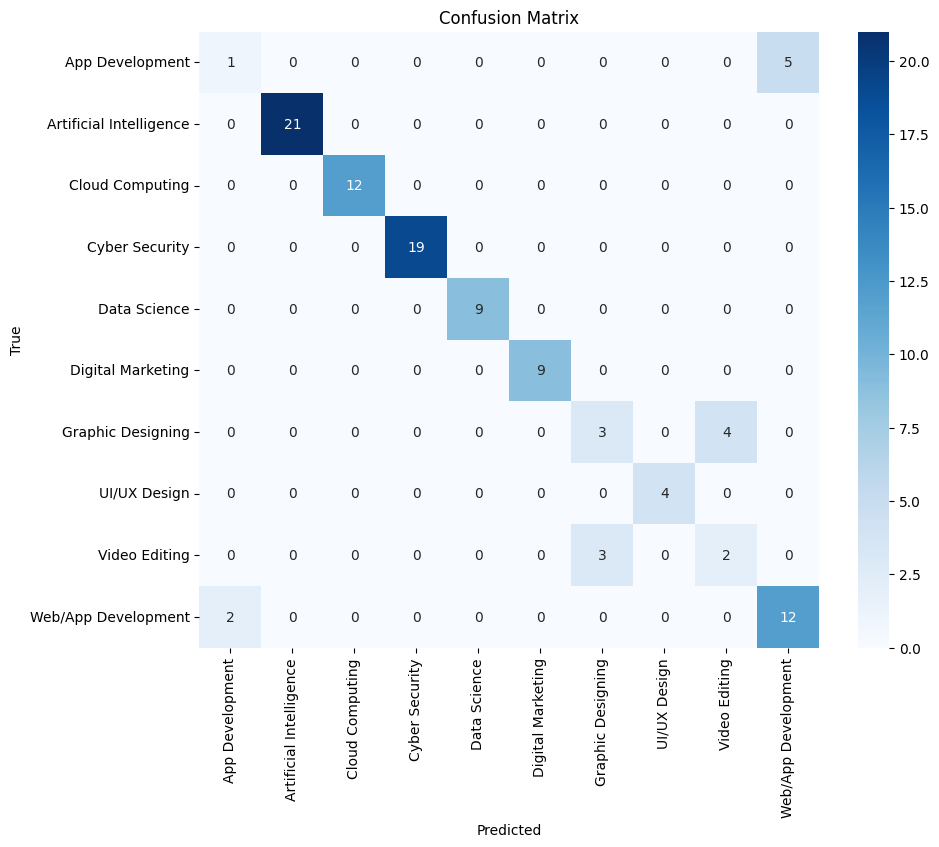

In [5]:
# Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [6]:
# Step 6: Recommendation Demo
new_student = pd.DataFrame([{
    "age": 21,
    "gender": "Female",
    "year_of_study": 2,
    "major": "CS",
    "study_hours": 4,
    "tech_experience": "Intermediate",
    "coding_interest": "High",
    "creativity": "Medium",
    "business_mindset": "Low"
}])

new_student = pd.get_dummies(new_student)
new_student = new_student.reindex(columns=X.columns, fill_value=0)

pred = model.predict(new_student)
print("Recommended Skill:", le.inverse_transform(pred)[0])

Recommended Skill: Web/App Development
